In [1]:
# https://keras.io/examples/vision/mnist_convnet/

In [4]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np


In [5]:
image, label = tfds.as_numpy( tfds.load('mnist', split='train', as_supervised=True, batch_size=-1))
image.shape, label.shape


E0000 00:00:1743241159.314305  201380 cuda_executor.cc:1228] INTERNAL: CUDA Runtime error: Failed call to cudaGetRuntimeVersion: Error loading CUDA libraries. GPU will not be used.: Error loading CUDA libraries. GPU will not be used.
W0000 00:00:1743241159.315481  201380 gpu_device.cc:2341] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2025-03-29 09:39:19.591357: I tensorflow/core/kernels/data/tf_record_dataset_op.cc:387] The default buffer size is 262144, which is overridden by the user specified `buffer_size` of 8388608


((60000, 28, 28, 1), (60000,))

In [7]:
Y = tf.keras.utils.to_categorical(label)
Y.shape

(60000, 10)

In [8]:
X = image
X.shape

(60000, 28, 28, 1)

label: 4


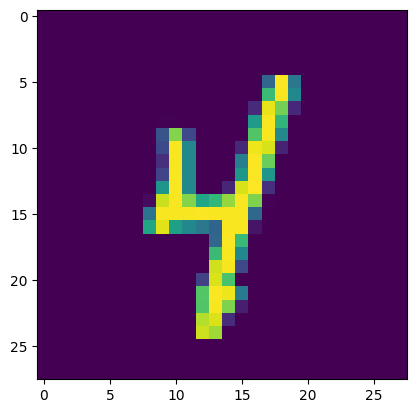

In [9]:
plt.imshow(X[0])
print(f'label: {np.argmax(Y[0])}')

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

In [11]:
model = tf.keras.Sequential()
input = tf.keras.layers.Input(shape=(28,28,1))
model.add(input)
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dropout(.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        16,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
history = model.fit(X_train, Y_train, batch_size=128, epochs=5, validation_split=.1)

Epoch 1/5
317/317 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.6714 - loss: 4.9225 - val_accuracy: 0.9582 - val_loss: 0.1453
Epoch 2/5
317/317 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - accuracy: 0.9278 - loss: 0.2385 - val_accuracy: 0.9729 - val_loss: 0.0911
Epoch 3/5
317/317 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.9510 - loss: 0.1625 - val_accuracy: 0.9753 - val_loss: 0.0789
Epoch 4/5
317/317 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.9588 - loss: 0.1337 - val_accuracy: 0.9776 - val_loss: 0.0707
Epoch 5/5
317/317 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.9661 - loss: 0.1102 - val_accuracy: 0.9811 - val_loss: 0.0643


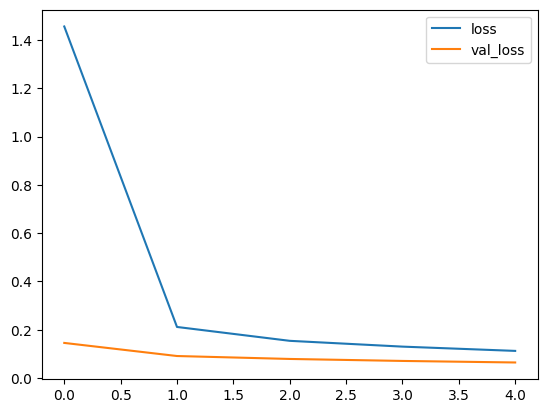

In [15]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()


In [17]:
results = model.predict(X_test)
results.shape

469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


(15000, 10)

In [27]:
(np.argmax(results, axis=1)==np.argmax(Y_test, axis=1)).mean()

np.float64(0.9822)

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


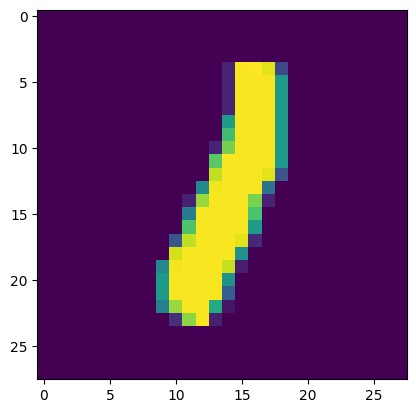

In [31]:
plt.imshow(X_test[100])
print(Y_test[100])

In [30]:
np.argmax(results[100])

np.int64(1)